# Experiment 5

### Lets start with the News Analysis

In [2]:
import sys
!{sys.executable} -m pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 2.8 MB/s eta 0:00:0000:01
You should consider upgrading via the '/Users/rodrigoesparza/.pyenv/versions/py_7_thesis/bin/python -m pip install --upgrade pip' command.


### Get Relevance of News

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [25]:
df_news = pd.read_csv('../Data/Preprocessed/clean-nyt-news.csv')
df_news = df_news.drop(['Unnamed: 0'], axis=1)
df_news = df_news.drop(['Unnamed: 0.1'], axis=1)
df_news.head()

,date,all_text,clean_text
0,2000-01-01,"Playoffs or No, Dallas Provides The Motivation...",playoff dallas provide motivation wait visit...
1,2000-01-01,"On This First Day, a Fanfare for the New Era; ...",day fanfare new era know world editor je...
2,2000-01-01,Internet's Cheering Squad Nervously Watches Cl...,internet s cheer squad nervously watch clock w...
3,2000-01-01,Economic Thinking Finds a Free Market WILL the...,economic thinking find free market force globa...
4,2000-01-01,INSIDE SPECIAL TODAY SPECIAL TODAY The Mille...,inside special today special today millenn...


In [26]:
df_news.shape

(2189674, 3)

In [27]:
df_news['date'] = pd.to_datetime(df_news['date'], format='%Y-%m-%d')

In [28]:
print("Oldst Date: ", df_news['date'].min())
print("Recent Date: ", df_news['date'].max())

Oldst Date:  2000-01-01 00:00:00
Recent Date:  2024-12-14 00:00:00


In [29]:
SPY_stocks = pd.read_csv("../data/Preprocessed/SPY_Data.csv")
SPY_stocks = SPY_stocks.drop(['Unnamed: 0', 'High', 'Low'], axis=1)
SPY_stocks.head()

,Date,Close
0,1999-07-26,84.923210
1,1999-07-27,85.632195
2,1999-07-28,85.907906
3,1999-07-29,84.706596
4,1999-07-30,83.662720


In [30]:
SPY_stocks['Daily_Return'] = SPY_stocks['Close'].pct_change() * 100 
SPY_stocks['Daily_Volatility'] = SPY_stocks['Daily_Return'].abs()
SPY_stocks.head()

,Date,Close,Daily_Return,Daily_Volatility
0,1999-07-26,84.923210,NaN,NaN
1,1999-07-27,85.632195,0.834853,0.834853
2,1999-07-28,85.907906,0.321971,0.321971
3,1999-07-29,84.706596,-1.398369,1.398369
4,1999-07-30,83.662720,-1.232344,1.232344


In [31]:
print(SPY_stocks['Daily_Volatility'].min())
print(SPY_stocks['Daily_Volatility'].max())
print(SPY_stocks['Daily_Volatility'].mean())

0.0
14.519701136270434
0.8132794618192994


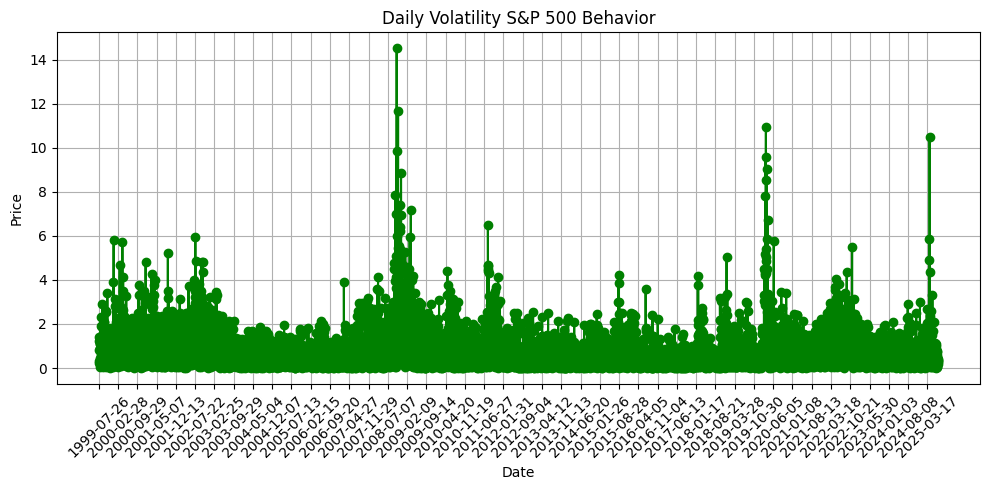

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(SPY_stocks['Date'], SPY_stocks['Daily_Volatility'], marker='o', linestyle='-', color='green')
plt.title('Daily Volatility S&P 500 Behavior')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

skip = 150
plt.xticks(SPY_stocks['Date'][::skip], rotation=45)

plt.tight_layout()
plt.show()

### Get segment Volatily